

```
# Created by: Dhruv Bejugam
# Last Updated on: 07/06/22
# Summary: Simple ODE approximator created using documentation, inverse and loss-terms 
# Reference: "Physics informed Deep Learning, Solutions of Nonlinear Partial Differential Equations" by Isaac Elias Lagaris, 
# Aristidis Likas, and Dimitrios I. Fotiadis
```



In [16]:
# importing required packages
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# defining the sequential neural network and its layers
N = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))

In [24]:
# initial condition
A = 0.

# trial solution using initial condition, neural network, and input
Psi_t = lambda x: A + x * N(x)

# ODE trying to be approximated 
f = lambda x, Psi: torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0

In [25]:
# loss function using gradient to minimize losses
def loss(x):

    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0] # returns the sum of gradients of outputs with respect to the inputs

    return  torch.mean( ( Psi_t_x - f(x, outputs) )  ** 2) # returns the mean value of all elements in the input tensor

# L-BFGS optimizer to improve accuracy and reduce overall loss
optimizer = torch.optim.LBFGS(N.parameters())

In [26]:
# establishing 'x' as tensor with 100 evenly spaced numbers from 0 to 4
x = torch.Tensor(np.linspace(0, 4, 100)[:, None])

# function that evaluates model and returns loss
def closure():

    optimizer.zero_grad()
    l = loss(x)
    l.backward() #backward propagation
    print(l)
    
    return l

# performing optimization of the model based on loss
for i in range(10):
    optimizer.step(closure)

tensor(0.3812, grad_fn=<MeanBackward0>)
tensor(0.4623, grad_fn=<MeanBackward0>)
tensor(0.1911, grad_fn=<MeanBackward0>)
tensor(0.1845, grad_fn=<MeanBackward0>)
tensor(0.0538, grad_fn=<MeanBackward0>)
tensor(0.0264, grad_fn=<MeanBackward0>)
tensor(0.0060, grad_fn=<MeanBackward0>)
tensor(0.0037, grad_fn=<MeanBackward0>)
tensor(0.0021, grad_fn=<MeanBackward0>)
tensor(0.0021, grad_fn=<MeanBackward0>)
tensor(0.0021, grad_fn=<MeanBackward0>)
tensor(0.0021, grad_fn=<MeanBackward0>)
tensor(0.0020, grad_fn=<MeanBackward0>)
tensor(0.0018, grad_fn=<MeanBackward0>)
tensor(0.0014, grad_fn=<MeanBackward0>)
tensor(0.0009, grad_fn=<MeanBackward0>)
tensor(0.0005, grad_fn=<MeanBackward0>)
tensor(0.0004, grad_fn=<MeanBackward0>)
tensor(0.0004, grad_fn=<MeanBackward0>)
tensor(0.0004, grad_fn=<MeanBackward0>)
tensor(0.0004, grad_fn=<MeanBackward0>)
tensor(0.0004, grad_fn=<MeanBackward0>)
tensor(0.0004, grad_fn=<MeanBackward0>)
tensor(0.0004, grad_fn=<MeanBackward0>)
tensor(0.0003, grad_fn=<MeanBackward0>)


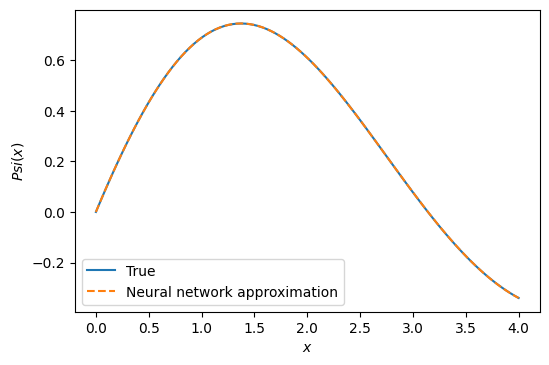

In [27]:
# establishing 'xx' as the same value as 'x' for graphing purposes
xx = np.linspace(0, 4, 100)[:, None]

# establishing 'yy' as neural net output and 'yt' as true ODE y points
with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = np.exp(-xx / 5.0) * np.sin(xx)

# graphing the true function compared to the neural network approximation
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='True')
ax.plot(xx, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='best');